In [1]:
import pandas as pd
import matplotlib.pyplot as plt

자료 출처 : https://dacon.io/competitions/official/235747/overview/description

In [17]:
# 한글 깨짐 방지
import platform

if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 

## EDA

In [3]:
# 데이터 불러오기
df = pd.read_csv('./data/train_data.csv', index_col=0)
df_topic = pd.read_csv('./data/topic_dict.csv')

In [4]:
# 데이터 라벨 확인
df_topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


7개의 주제로 나뉘어진 뉴스

In [5]:
# 데이터 확인
df.head()

,title,topic_idx
index,,
0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [6]:
# 결측치 확인
df.isna().sum()

title        0
topic_idx    0
dtype: int64

In [7]:
# 중복값 확인
df.duplicated().sum()

0

In [8]:
df.topic_idx.value_counts()

4    7629
2    7362
5    6933
6    6751
1    6222
3    5933
0    4824
Name: topic_idx, dtype: int64

In [9]:
df_topic['topic']

0    IT과학
1      경제
2      사회
3    생활문화
4      세계
5     스포츠
6      정치
Name: topic, dtype: object

In [10]:
df_count = pd.DataFrame(df['topic_idx'].value_counts())
df_count.reset_index(inplace=True)
df_count.sort_values('index', inplace=True)

In [22]:
# 시각화 함수
def checkData(data) :
    df_count = pd.DataFrame(data['topic_idx'].value_counts())
    df_count.reset_index(inplace=True)
    df_count.sort_values('index', inplace=True)

    # 데이터 시각화
    plt.figure(figsize=(13,10))
    plt.bar(df_topic['topic'], df_count['topic_idx'])
    plt.show()

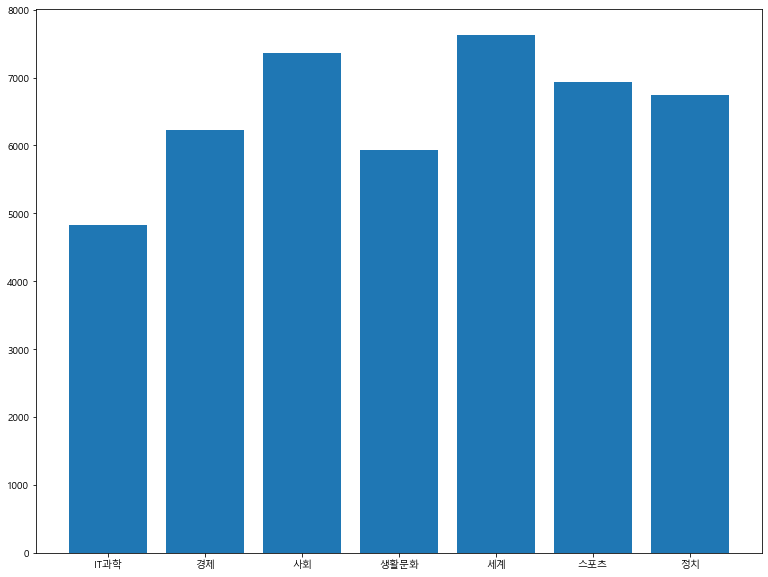

In [23]:
checkData(df)

**자료 중 'IT 과학', '생활문화', '경제' 뉴스를 크롤링 하여 추가**